In [1]:
import pandas as pd
import json
import os
from tqdm import tqdm

import numpy as np
from zindi_code import CLS_MAPPER
CLS_MAPPER["NEG"] = 2
CLS_MAPPER

{'Trophozoite': 0, 'WBC': 1, 'NEG': 2}

In [2]:
VALID_PTH = "zindi_data/ValDataset.csv"
PRDICTION_PTH = 'zindi_data/validation/prediction_cond-detr-50_THR0.000_IOU0.400_ID464.csv'
THR_INF = 0.01

In [3]:
valid_data = pd.read_csv(VALID_PTH)

predictions = pd.read_csv(PRDICTION_PTH)

predictions["xmax"] =  predictions["w"] + predictions["xmin"]
predictions["ymax"] = predictions["h"] + predictions["ymin"]
predictions.sample(3)

,Image_ID,xmin,ymin,w,h,class,confidence,xmax,ymax
570,id_0fdars2kkw.jpg,338.74,325.66,30.50,30.62,Trophozoite,0.367,369.24,356.28
2128,id_87rt6lehbn.jpg,2012.78,1339.30,92.19,115.26,Trophozoite,0.141,2104.97,1454.56
2946,id_x7nd051hom.jpg,952.91,2687.61,79.27,96.27,Trophozoite,0.295,1032.18,2783.88


In [4]:
valid_data["w"] = valid_data["xmax"] - valid_data["xmin"]
valid_data["h"] = valid_data["ymax"] - valid_data["ymin"]

valid_data.sample(3)

,Image_ID,class,confidence,ymin,xmin,ymax,xmax,width,height,w,h
1676,id_x7nd051hom.jpg,Trophozoite,1.0,1939,1772,2018,1871,4032,3016,99,79
1630,id_h1ok5iazab.jpg,Trophozoite,1.0,1602,1684,1684,1755,4160,3120,71,82
755,id_ytq3slqkjm.jpg,Trophozoite,1.0,36,927,68,959,1920,1080,32,32


In [5]:
len(set(valid_data["Image_ID"]).intersection(predictions["Image_ID"])), valid_data["Image_ID"].nunique()

(275, 275)

In [6]:
import random


image_id = random.choice(valid_data["Image_ID"].unique())
image_id

'id_taz7z5iuzk.jpg'

In [7]:
from PIL import Image, ImageDraw
import os

cols = ["xmin", "ymin", "xmax", "ymax"]
color_map = {"Trophozoite": "red", "WBC": "blue"}
color_map_test = {"Trophozoite": "yellow", "WBC": "green"}


def draw(image_id: str):
	img = Image.open(os.path.join("zindi_data/images", image_id))
	draw = ImageDraw.Draw(img)
	
	raw = predictions[(predictions["Image_ID"] == image_id) & (predictions["class"] != "NEG")]
	for _, line in raw.iterrows():
		draw.rectangle([line[i] for i in cols], fill=None, outline=color_map_test[line["class"]])
	
	raw = valid_data[(valid_data["Image_ID"] == image_id) & (valid_data["class"] != "NEG")]
	for _, line in raw.iterrows():
		draw.rectangle([line[i] for i in cols], fill=None, outline=color_map[line["class"]])
	return img

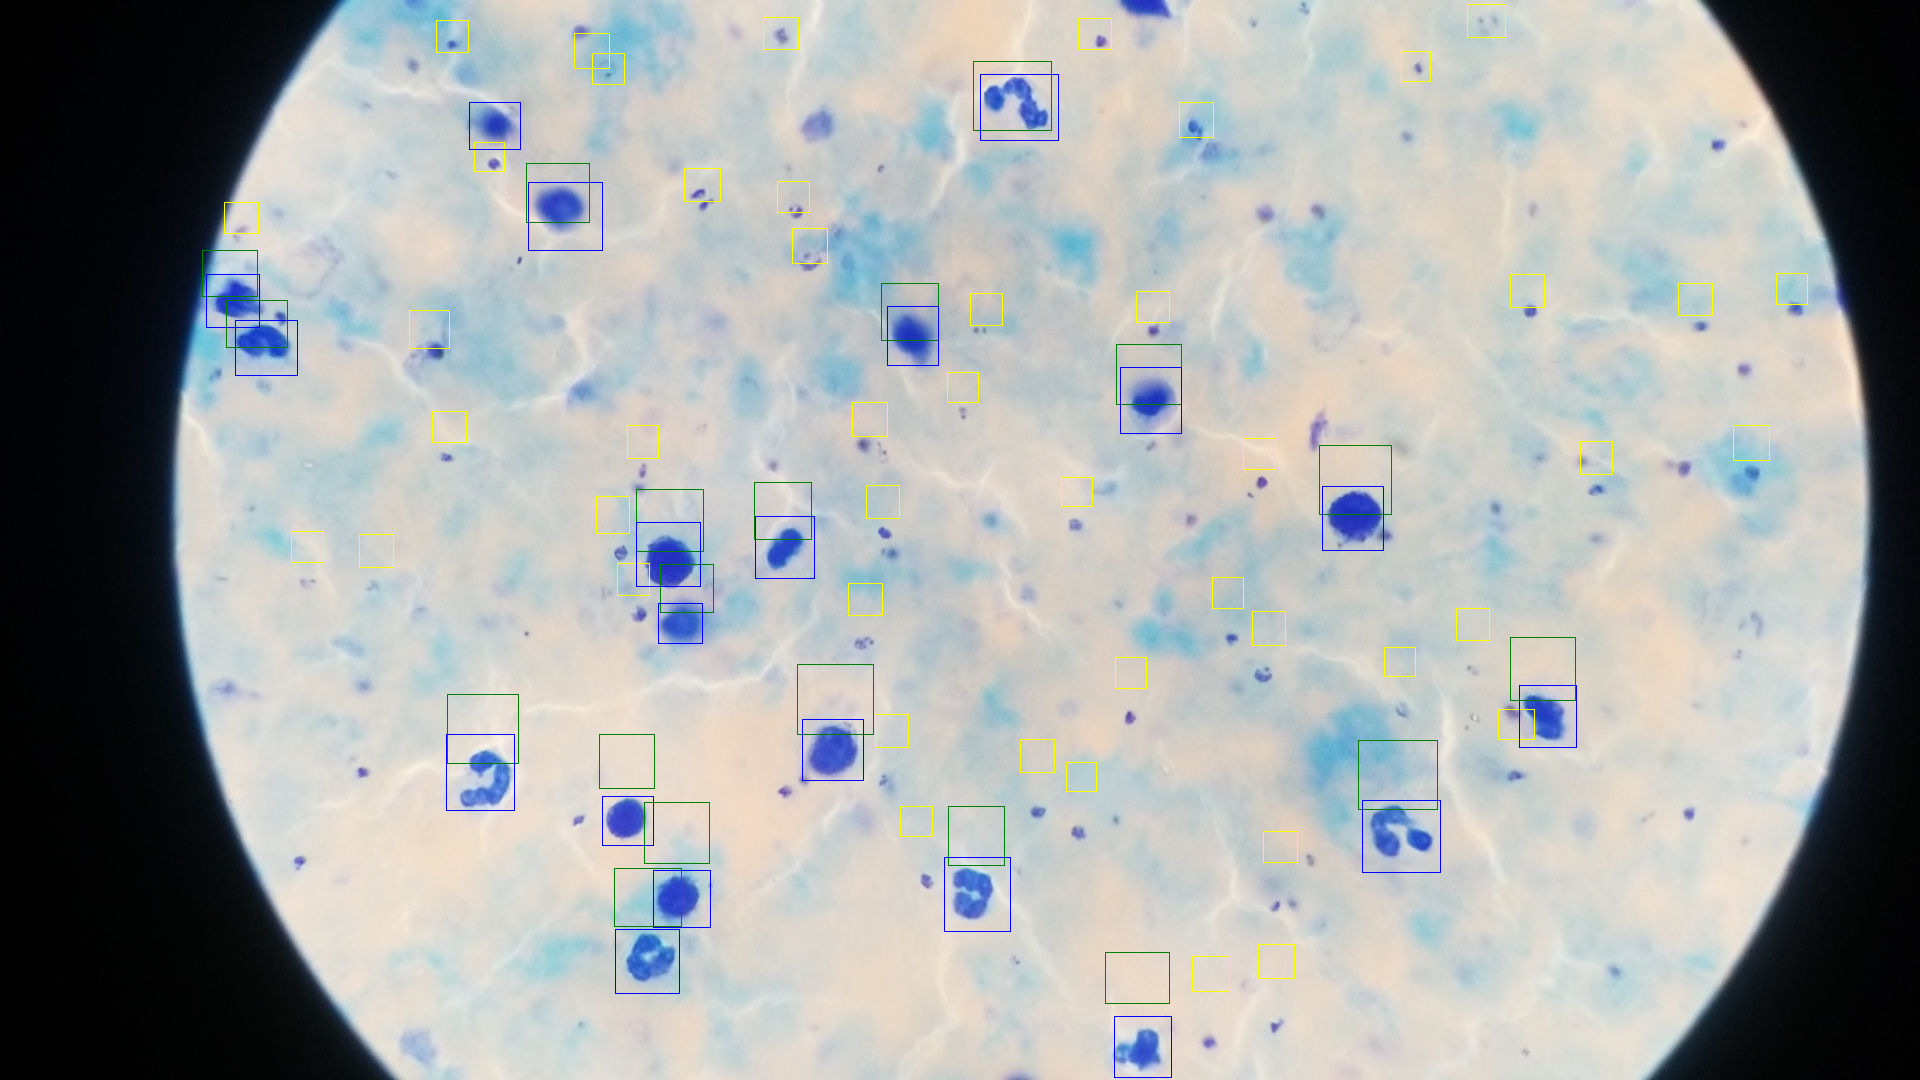

In [8]:
draw(image_id)